In [1]:
#imports
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import sys
import os
sys.path.append(os.path.abspath(".."))
from normal_models import package_classification, package_detection

(-0.5, 1199.5, 629.5, -0.5)

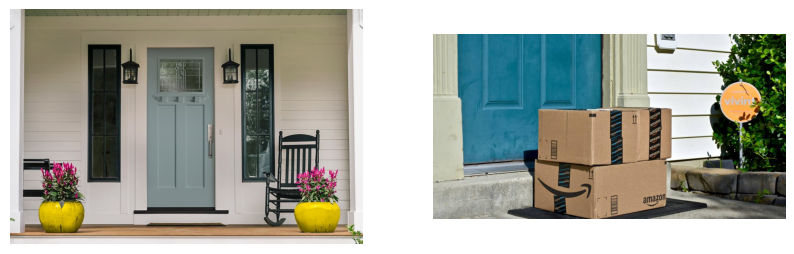

In [2]:
#original images
no_package_path = "demo_images/demo0.jpeg"
package_path = "demo_images/demo1.jpg"

image0 = Image.open(no_package_path)
image1 = Image.open(package_path)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image0)
ax[0].axis("off")

ax[1].imshow(image1)
ax[1].axis("off")

In [3]:
#package classification
classifier = package_classification.CustomCNN()

classifier0 = classifier.prediction(no_package_path)
classifier1 = classifier.prediction(package_path)

if(classifier0 == 1):
    print("package detected")
else:
    print("no package detected")

if(classifier1 == 1):
    print("package detected")
else:
    print("no package detected")

no package detected
package detected


tensor([0.8263], device='cuda:0')
tensor([[205.9315, 195.3997, 293.2385, 284.4813]], device='cuda:0')


(-0.5, 415.5, 415.5, -0.5)

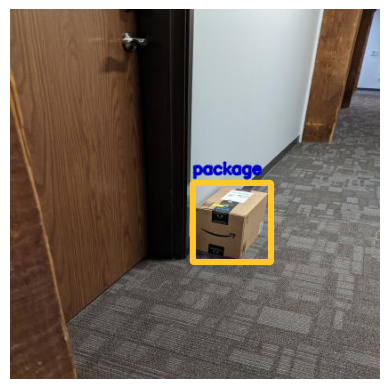

In [4]:
#when a package is detected, run package detection model
detector = package_detection.FinedTunedFasterRCNNPackage()
bboxes = detector.prediction("demo_images/test.jpg")

print(bboxes)

#display output image
image = cv2.imread("demo_images/test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(len(bboxes)):
    x1,y1,x2,y2 = bboxes[i].cpu().numpy().astype("int")

    class_name = "package"

    image = cv2.rectangle(image, (x1, y1), (x2, y2), (255, 199, 46), 5) 
    image = cv2.putText(image, class_name, (x1, y1-10), font, 0.6, (0, 0, 200), 2, cv2.LINE_AA) 

plt.imshow(image)
plt.axis("off")




